**Portfolio investing is a fascinating kind of investment that can potentially lead to satisfactory returns. According to Modern Portfolio Theory, it’s always a good idea to select stocks or ETFs that show a low correlation.**

## Why should we select uncorrelated stocks?

If we build a portfolio made by some stocks and their weights are x, the variance of the portfolio is:

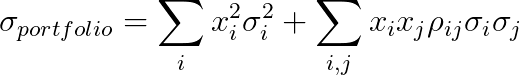

So, as long as the correlation between stocks is positive, the variance of our portfolio increases with respect to the sum of the variances and so does its risk. Some may argue that we would like stocks that are negatively correlated, but in this case, there wouldn’t be any return, because if a stock rises, the other stock falls and the net return is 0.

So, the idea is to keep our stocks uncorrelated in order to remove the second term and avoid a higher variance. That is the purpose of a branch of Modern Portfolio Theory and there are mathematical tools that allow us to optimize variance according to the weights x. For this article, we are going to focus on selecting those stocks that show an absolute value of the linear correlation nearly equal to 0.

In [8]:
import pandas as pd
import ffn 
import numpy as np
from pylab import mpl, plt
import scipy.stats as scs
import scipy.optimize as sco
import time
plt.style.use('seaborn')
mpl.rcParams['font.family'] = 'serif'
%matplotlib inline

In [ ]:
def get_sp500():
    """
    Get list of S&P 500 stocks from wikipedia
    """
    sp500_tickers = pd.read_html('https://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    sp500_tickers = sp500_tickers[0]

    tickers = sp500_tickers['Symbol'].values.tolist()
    return tickers

companies = get_sp500()

In [ ]:
import os
from pandas_datareader import data as pdr
import pandas as pd
#import fix_yahoo_finance as yf
import yfinance as yf

yf.pdr_override()

START_DATE = "2021-01-01"
END_DATE = "2021-04-01"

def build_stock_dataset(start=START_DATE, end=END_DATE):
    """
    Creates the dataset containing all stock prices
    :returns: stock_prices.csv
    """
    ticker_list = get_sp500()

    # Get all Adjusted Close prices for all the tickers in our list,
    # between START_DATE and END_DATE
    all_data = pdr.get_data_yahoo(ticker_list, start, end)
    stock_data = all_data["Adj Close"]

    # Remove any columns that hold no data, and print their tickers.
    stock_data.dropna(how="all", axis=1, inplace=True)
    missing_tickers = [
        ticker for ticker in ticker_list if ticker.upper() not in stock_data.columns
    ]
    print(f"{len(missing_tickers)} tickers are missing: \n {missing_tickers} ")
    # If there are only some missing datapoints, forward fill.
    stock_data.ffill(inplace=True)
    stock_data.to_csv("stock_prices.csv")
    
build_stock_dataset()

[*********************100%***********************]  505 of 505 completed

2 Failed downloads:
- BRK.B: No data found, symbol may be delisted
- BF.B: No data found for this date range, symbol may be delisted
2 tickers are missing: 
 ['BRK.B', 'BF.B'] 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4327: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  downcast=downcast,


In [9]:
stocks = pd.read_csv("stock_prices.csv")
stocks.head()

,Date,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,...,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
0,2020-12-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-01-04,118.459747,15.13,157.123825,128.997803,102.939789,95.746490,316.730011,108.274658,254.798035,485.339996,145.397141,49.523808,168.096970,296.839996,75.565613,80.116394,22.962521,42.886234,36.884716,131.399780,119.766922,105.239998,152.239166,526.460022,49.240002,107.287674,114.131126,156.809998,86.705444,11.262413,92.300003,118.185791,223.416199,186.397797,218.467239,3186.629883,283.160004,357.670013,317.519897,...,217.107101,84.608238,36.498192,54.199249,146.207825,35.768425,202.540329,213.580002,229.429993,46.494473,18.540001,57.606892,72.437752,250.149994,41.009056,52.230000,89.027275,60.550266,29.541864,175.757339,203.083511,114.287422,19.762255,145.349930,64.835655,42.255943,285.254730,21.566744,32.643650,106.900002,65.173874,142.429993,40.221066,53.660934,99.407997,105.315231,152.927170,378.130005,42.397789,163.093948
2,2021-01-05,119.428276,15.43,156.954056,130.592697,104.004242,96.996651,322.600006,109.614319,256.248596,485.690002,147.996002,50.487076,167.629364,301.700012,75.198364,80.008316,23.733208,42.955742,37.500618,131.439560,118.970070,105.419998,162.512772,543.650024,49.860001,106.443909,114.350456,157.360001,89.430267,11.341586,92.769997,119.004440,224.500443,185.307800,219.571518,3218.510010,286.010010,359.829987,314.051483,...,213.866837,84.816978,36.887108,55.745575,147.245544,34.773232,201.631851,206.500000,228.580002,47.049866,18.100000,57.342598,73.345085,255.429993,40.771320,53.060001,88.741615,60.904129,30.367445,177.575531,201.388657,114.665619,20.362003,144.576218,64.276543,43.311096,290.698669,21.893663,32.952076,110.190002,64.538605,144.229996,42.159431,55.198383,99.288330,105.325180,155.573135,380.570007,43.069359,164.230499
3,2021-01-06,122.703293,15.52,166.021576,126.196747,103.105804,105.340981,321.609985,109.386086,259.050293,466.309998,148.663147,52.532776,167.042374,302.869995,75.823692,80.646973,24.681744,44.613998,39.944366,137.208389,121.450272,101.529999,174.651627,540.390015,51.520000,109.183670,116.952499,157.759995,90.657944,11.658279,90.330002,124.046158,229.911880,195.940140,213.781525,3138.379883,285.869995,349.899994,327.227509,...,211.982513,86.954048,40.088181,56.990417,160.406525,35.875751,199.725037,199.509995,226.649994,47.972218,18.490000,58.037601,78.918762,262.470001,42.623661,53.410000,89.864555,63.479488,32.515942,177.466232,203.083511,117.203575,21.138729,145.478897,66.482994,46.038570,293.815247,22.904140,33.121216,110.849998,65.967941,141.220001,43.235222,57.863960,103.476448,105.902420,160.006393,394.820007,47.908611,166.643158
4,2021-01-07,125.968323,15.38,167.439621,130.502991,104.209320,109.270058,323.559998,110.447891,261.494385,477.739990,154.946228,52.066040,167.987534,315.200012,73.689629,78.495201,24.434729,44.365757,40.619877,138.590912,121.848701,102.809998,183.528824,558.359985,51.320000,109.263084,120.033089,155.750000,94.380875,11.559314,95.160004,124.195915,230.670868,198.308380,216.378067,3162.159912,295.970001,365.019989,336.257355,...,213.168945,87.749237,40.008400,58.031025,161.653778,34.958614,200.633514,200.000000,232.899994,47.049866,18.520000,57.907001,81.700607,260.790009,44.832603,54.740002,86.939011,62.221294,33.252003,181.291367,204.628830,117.492203,21.178059,145.468964,65.903931,45.620491,303.724274,22.646568,33.439594,109.750000,64.677574,149.710007,43.574436,

In [11]:
cor_mat = stocks.corr(method='pearson')
cor_mat

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,ADI,ADM,ADP,ADSK,AEE,AEP,AES,AFL,AIG,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMCR,AMD,AME,AMGN,AMP,AMT,AMZN,ANET,ANSS,ANTM,AON,...,V,VFC,VIAC,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VTRS,VZ,WAB,WAT,WBA,WDC,WEC,WELL,WFC,WHR,WLTW,WM,WMB,WMT,WRB,WRK,WST,WU,WY,WYNN,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
A,1.000000,-0.311896,0.013510,0.347249,0.365341,0.068024,0.421574,0.107844,0.336719,0.590301,0.837760,-0.095655,-0.251546,0.661915,-0.012938,-0.041031,0.437644,-0.190204,-0.184924,0.064716,-0.246542,0.136842,0.499254,0.553711,-0.187790,-0.272988,0.157175,0.589645,0.143306,-0.143993,0.525881,0.207321,0.364995,-0.002717,0.414466,0.409596,0.663656,0.693063,-0.078684,-0.129076,...,-0.202463,0.378207,-0.383809,-0.323752,0.059522,-0.437960,0.487545,0.356472,0.258490,-0.286747,0.508229,0.242193,0.638390,0.414332,0.070459,-0.216950,-0.076467,-0.233969,-0.121873,-0.022866,-0.056072,-0.063502,-0.154642,0.559943,-0.184202,-0.183668,0.638498,-0.192149,0.071743,-0.287157,0.225376,0.602486,-0.277244,-0.117894,0.356305,0.394436,0.473090,-0.032400,-0.151986,0.798861
AAL,-0.311896,1.000000,0.707106,-0.756701,-0.110852,0.650099,-0.709510,0.335451,0.528525,-0.600927,-0.180164,0.847039,0.904522,-0.819758,0.526696,0.382183,0.280658,0.942200,0.904525,0.242574,0.814584,-0.586767,-0.721012,-0.370416,0.952517,0.683286,0.376552,-0.720516,0.774986,0.585893,-0.866241,0.481341,0.010193,0.850594,-0.079526,-0.637977,-0.604517,-0.690795,0.557807,0.741354,...,0.581265,-0.628851,0.792126,0.875987,0.705446,0.952166,-0.832888,-0.619386,-0.618372,0.905254,-0.876178,-0.060052,-0.435514,0.159885,0.725417,0.840087,0.192003,0.917708,0.903500,0.740408,0.692021,0.620478,0.841016,-0.853903,0.898288,0.752528,-0.811555,0.882505,0.709538,0.884430,-0.189929,-0.834278,0.885938,0.611767,0.165578,0.343570,0.200473,0.750118,0.868720,-0.646904
AAP,0.013510,0.707106,1.000000,-0.742694,0.134210,0.778111,-0.710651,-0.154174,0.781099,-0.551985,0.015834,0.624375,0.817456,-0.492834,0.761446,0.549695,0.189922,0.779355,0.787351,0.668294,0.825168,-0.524554,-0.344084,-0.456255,0.727590,0.783871,0.739329,-0.394489,0.554629,0.719600,-0.648226,0.756158,0.256115,0.619012,-0.109284,-0.684897,-0.433235,-0.582074,0.912545,0.389521,...,0.537229,-0.112034,0.477585,0.560339,0.692674,0.682147,-0.372419,-0.398152,-0.221488,0.674318,-0.634844,0.483311,-0.009274,-0.069858,0.545304,0.413181,0.483389,0.709549,0.807990,0.664059,0.362469,0.873731,0.693844,-0.478148,0.856465,0.907294,-0.495899,0.698436,0.523780,0.618228,0.299828,-0.573098,0.658116,0.814243,0.657252,0.715055,0.247962,0.425335,0.769243,-0.284862
AAPL,0.347249,-0.756701,-0.742694,1.000000,0.057497,-0.398186,0.804439,0.033947,-0.453316,0.705603,0.164041,-0.714366,-0.751656,0.641647,-0.421159,-0.171266,-0.158292,-0.753195,-0.801057,-0.312200,-0.782093,0.807220,0.570600,0.479281,-0.774139,-0.575025,-0.351671,0.717710,-0.516844,-0.657888,0.812028,-0.659108,0.262629,-0.611630,0.423331,0.884603,0.743547,0.741249,-0.665178,-0.552612,...,-0.631636,0.320397,-0.540800,-0.754030,-0.749537,-0.751944,0.645479,0.481725,0.500436,-0.789031,0.787048,-0.235833,0.401885,0.166475,-0.310269,-0.615099,-0.143366,-0.796743,-0.814939,-0.363603,-0.455733,-0.609248,-0.760994,0.777693,-0.803406,-0.773151,0.765396,-0.645969,-0.422343,-0.762127,0.152721,0.782993,-0.761923,-0.551723,-0.338228,-0.335220,-0.149166,-0.634742,-0.820364,0.523701
ABBV,0.365341,-0.110852,0.134210,0.057497,1.000000,-0.076368,0.203649,-0.386455,0.060381,-0.072096,0.370994,0.046659,-0.164589,0.295729,-0.134513,-0.159981,0.394613,0.045143,0.107593,0.137663,0.041437,0.027994,0.390486,0.099411,0.011756,0.121629,-0.034877,0.252801,0.065160,0.017795,0.159963,0.074154,0.133541,0.074547,-0.213064,-0.043099,0.094299,0.057511,0.086424,-0.113196,...,0.111272,0.346079,-0.125862,0.010049,0.235575,-0.082343,0.059234,-0.181363,0.339357,0.008656,-0.000848,0.280988,0.355536,0.008717,-0.020083,-0.233907,-0.091074,-0.051025,0.021888,-0.014956,-0.152818,-0.015466,0.096302,0.135112

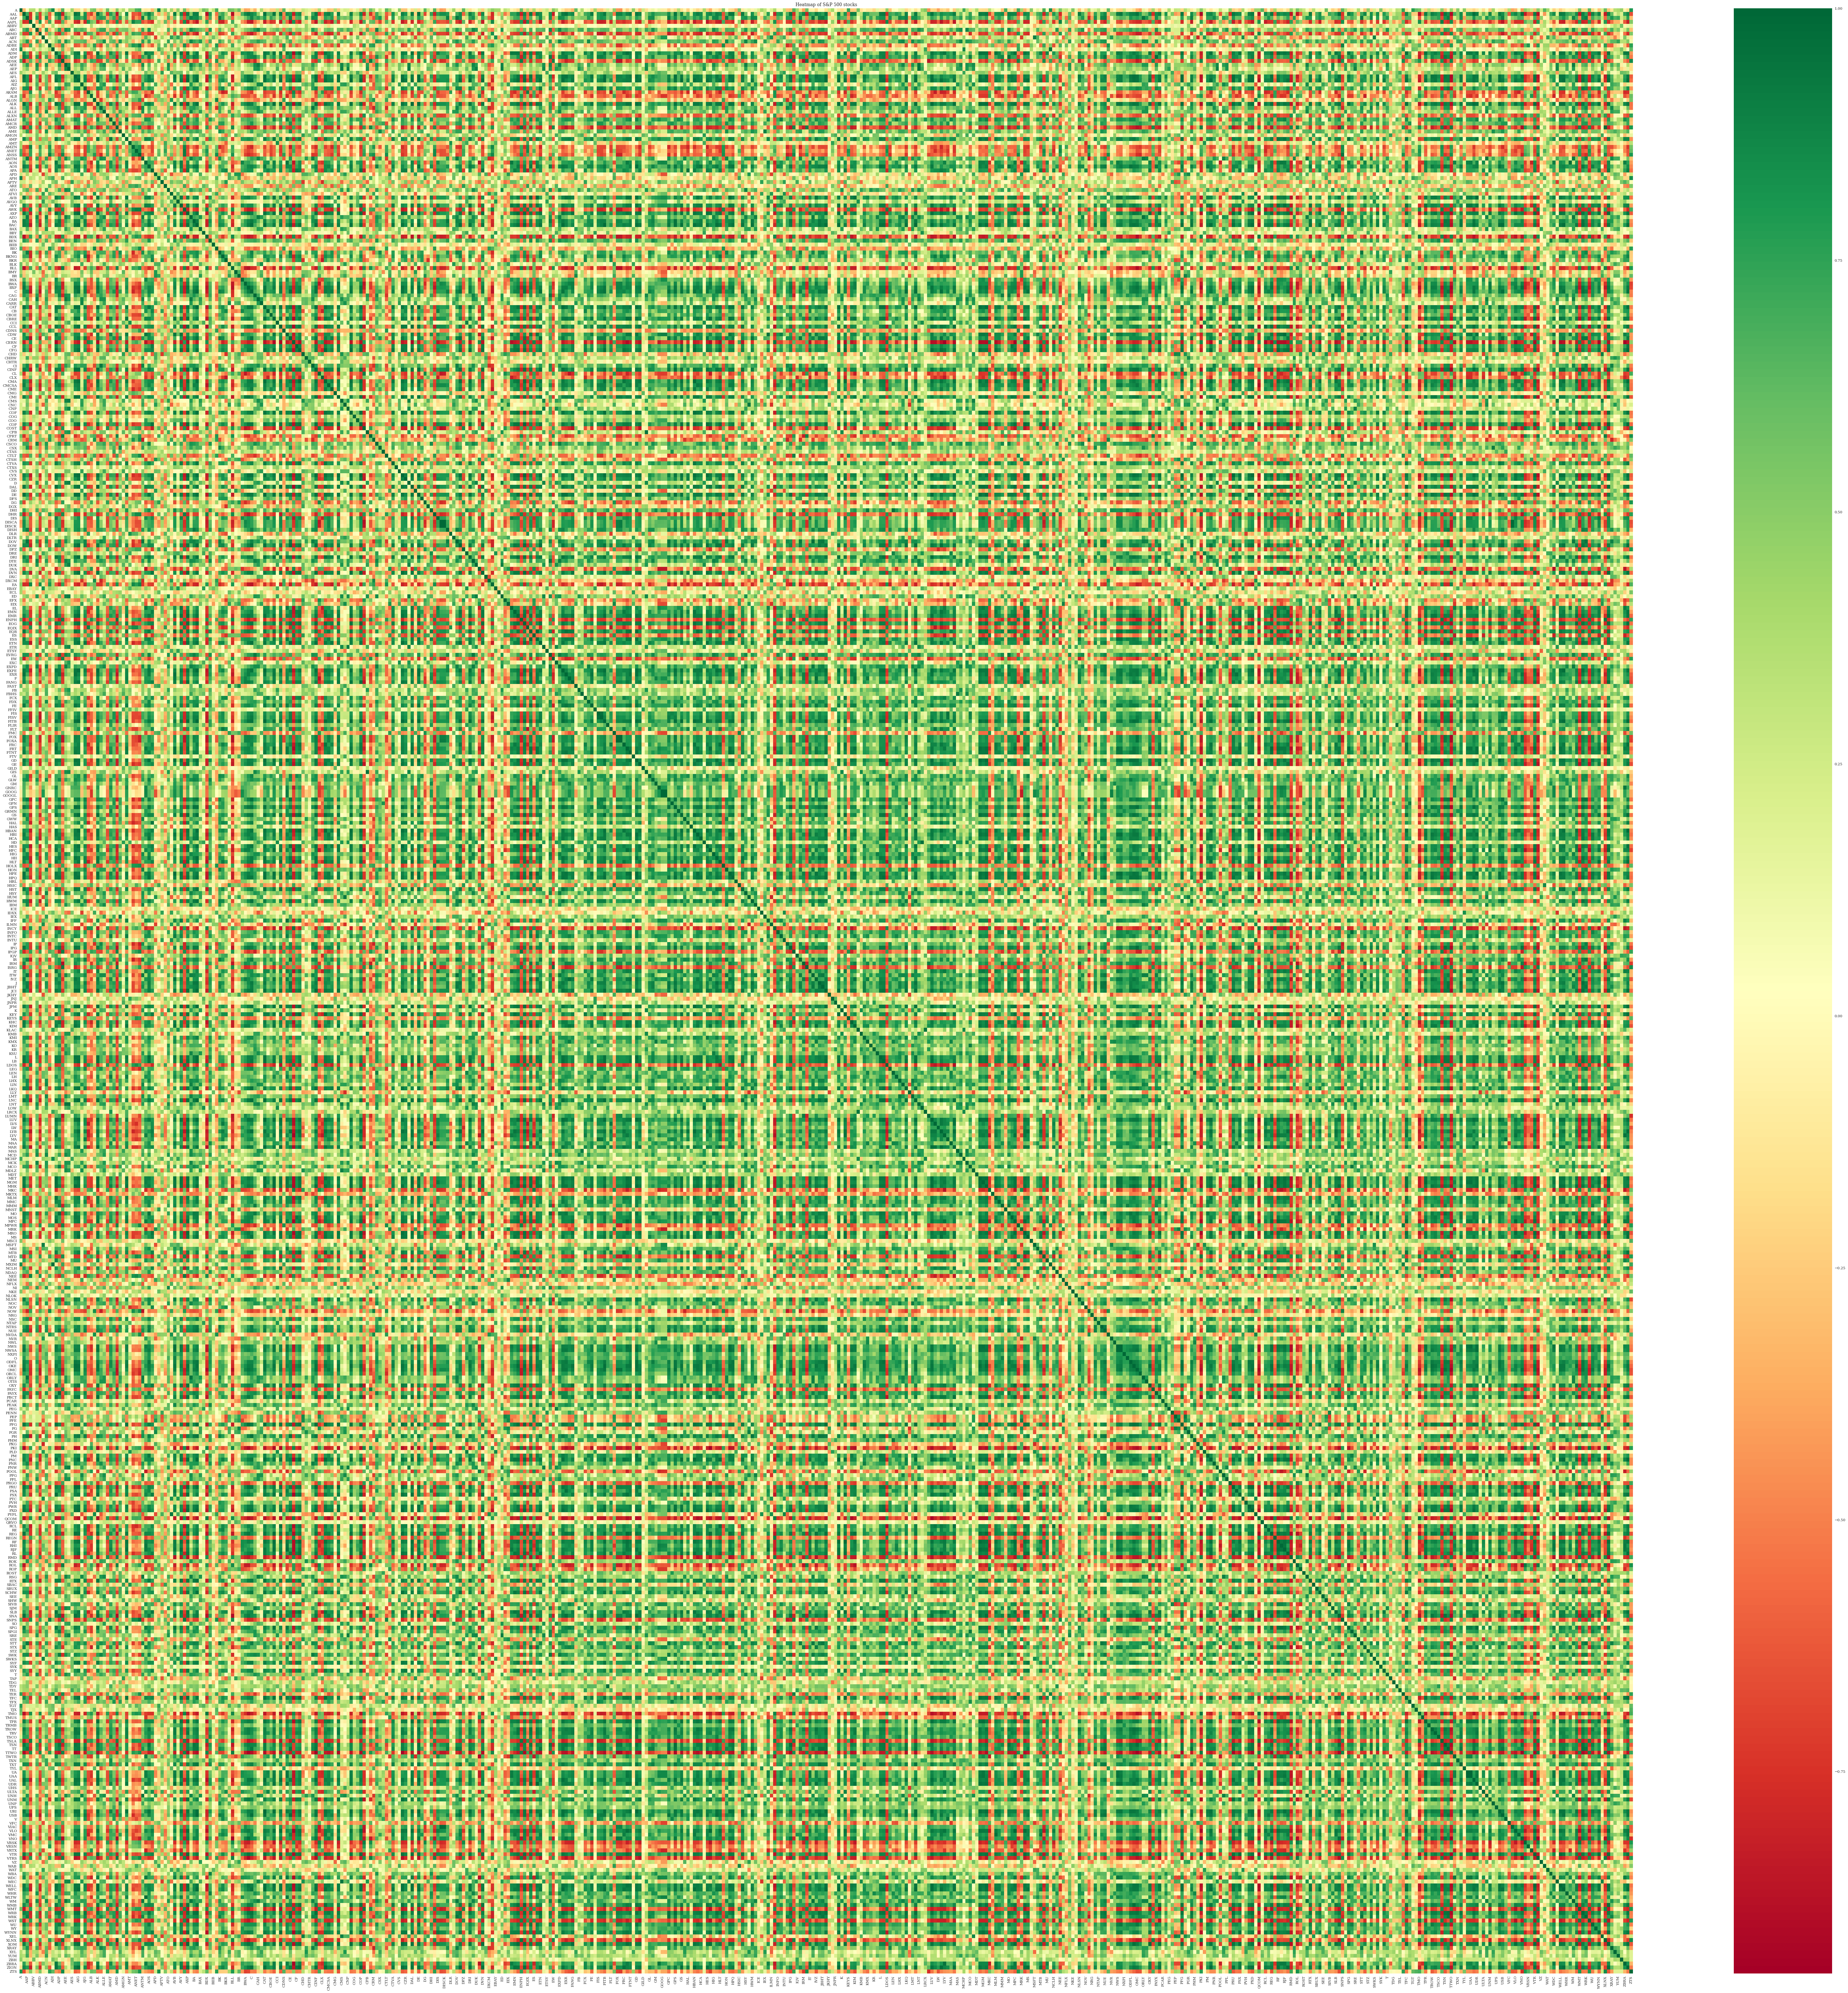

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,20

fig = plt.figure(figsize=(100,100))
r = sns.heatmap(stocks.corr(method='pearson'), cmap='RdYlGn')
r.set_title("Heatmap of S&P 500 stocks")
plt.savefig("test.svg", format="svg")

In [29]:
ticker = input('Enter ticker to find uncorrelated pair with: ')
ticker = ticker.split()[0]

Enter ticker to find uncorrelated pair with: MSFT


## Printing list of Uncorrelated stocks

In [42]:
uncorrelated_threshold = 0.3
cor_mat.abs().unstack()[cor_mat.abs().unstack() <= uncorrelated_threshold][ticker].keys().values

array(['A', 'AAP', 'AAPL', 'ABC', 'ABMD', 'ACN', 'ADBE', 'ADI', 'ADP',
       'ADSK', 'AEE', 'AEP', 'AIG', 'AJG', 'AKAM', 'ALL', 'ALLE', 'ALXN',
       'AMCR', 'AMD', 'AME', 'AMGN', 'ANET', 'ANSS', 'APA', 'APH', 'ARE',
       'ATO', 'AWK', 'AXP', 'AZO', 'BA', 'BAC', 'BDX', 'BIO', 'BK',
       'BKNG', 'BKR', 'BLL', 'BXP', 'C', 'CAG', 'CAH', 'CAT', 'CBOE',
       'CCL', 'CDNS', 'CE', 'CF', 'CFG', 'CHD', 'CHTR', 'CI', 'CINF',
       'CLX', 'CMA', 'CME', 'CMI', 'CMS', 'CNP', 'COG', 'COP', 'COST',
       'CPB', 'CPRT', 'CSX', 'CTAS', 'CTLT', 'CTVA', 'CVS', 'CVX', 'CZR',
       'D', 'DFS', 'DGX', 'DHR', 'DISH', 'DLTR', 'DOV', 'DOW', 'DPZ',
       'DTE', 'DUK', 'DVN', 'EA', 'EFX', 'EMN', 'ENPH', 'EOG', 'EQIX',
       'ES', 'ETN', 'ETR', 'EVRG', 'EXC', 'EXPD', 'EXPE', 'FBHS', 'FCX',
       'FDX', 'FIS', 'FISV', 'FITB', 'FLT', 'FOX', 'FOXA', 'FRC', 'GE',
       'GIS', 'GL', 'GLW', 'GPC', 'GPN', 'GPS', 'GS', 'HAL', 'HBAN', 'HD',
       'HES', 'HIG', 'HII', 'HLT', 'HOLX', 'HON', 'HST', 'HSY', 'HW

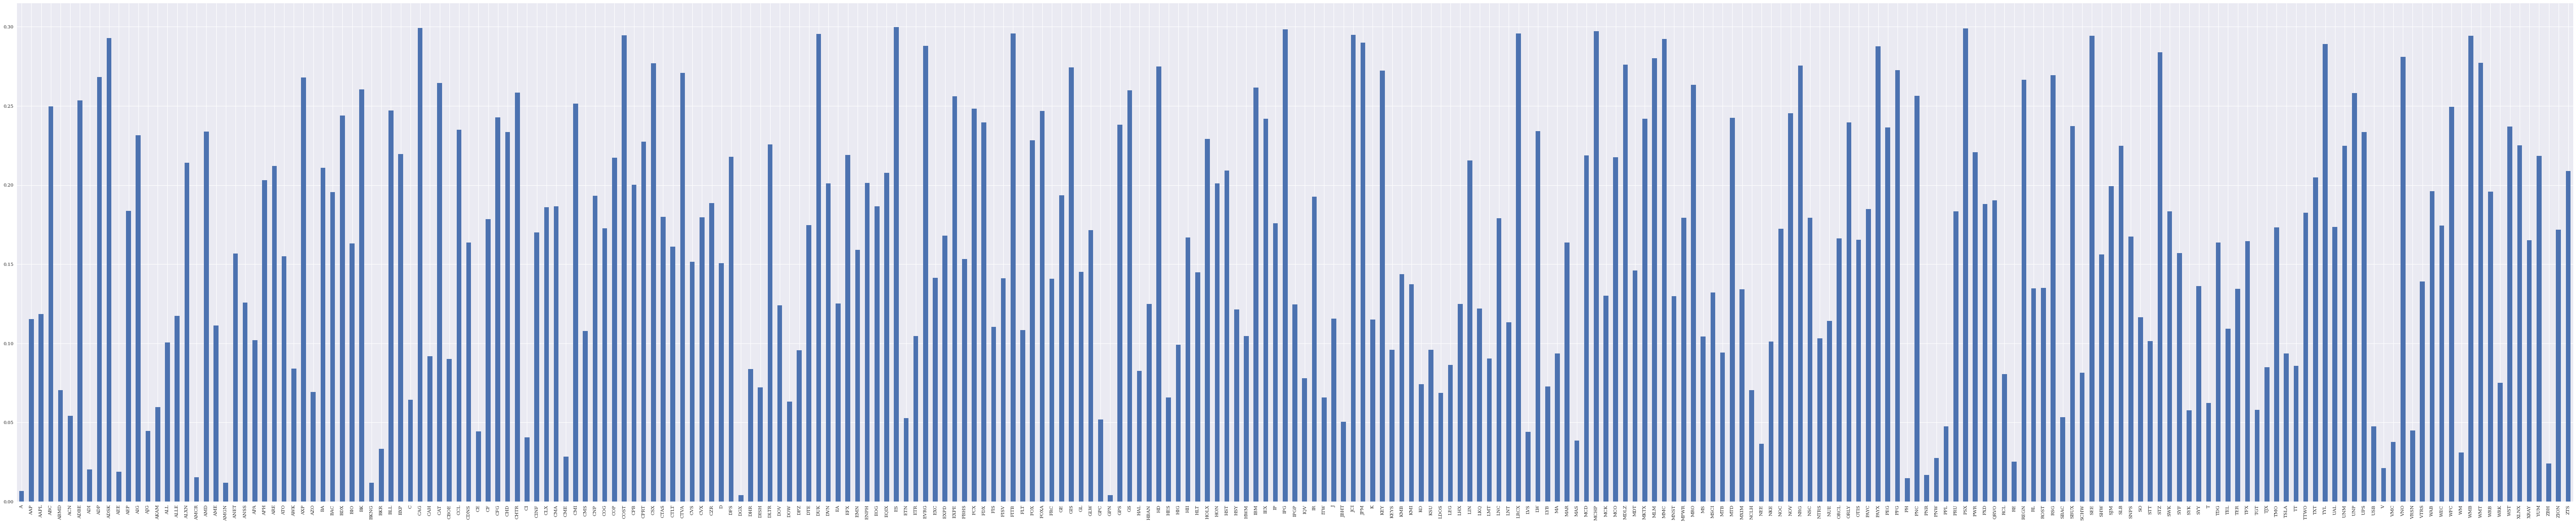

In [41]:
plt.rcParams["figure.figsize"] = (100, 20)
(cor_mat.abs().unstack()[cor_mat.abs().unstack() <= uncorrelated_threshold][ticker]).plot.bar()

Reference: https://towardsdatascience.com/how-to-pick-uncorrelated-stocks-for-an-investment-portfolio-in-python-d75867d1c11e